**Chapter 10 – Introduction to Artificial Neural Networks**

_This notebook contains all the sample code and solutions to the exercises in chapter 10._

# Setup

First, let's make sure this notebook works well in both python 2 and 3, import a few common modules, ensure MatplotLib plots figures inline and prepare a function to save the figures:

In [1]:
# To support both python 2 and python 3
from __future__ import division, print_function, unicode_literals

# Common imports
import numpy as np
import os

# to make this notebook's output stable across runs
def reset_graph(seed=42):
    tf.reset_default_graph()
    tf.set_random_seed(seed)
    np.random.seed(seed)

# To plot pretty figures
%matplotlib inline
import matplotlib
import matplotlib.pyplot as plt
plt.rcParams['axes.labelsize'] = 14
plt.rcParams['xtick.labelsize'] = 12
plt.rcParams['ytick.labelsize'] = 12

# Where to save the figures
PROJECT_ROOT_DIR = "."
CHAPTER_ID = "ann"

def save_fig(fig_id, tight_layout=True):
    path = os.path.join(PROJECT_ROOT_DIR, "images", CHAPTER_ID, fig_id + ".png")
    print("Saving figure", fig_id)
    if tight_layout:
        plt.tight_layout()
    plt.savefig(path, format='png', dpi=300)

# Perceptrons

**Note**: we set `max_iter` and `tol` explicitly to avoid warnings about the fact that their default value will change in future versions of Scikit-Learn.

In [2]:
import numpy as np
from sklearn.datasets import load_iris
from sklearn.linear_model import Perceptron

iris = load_iris()
X = iris.data[:, (2, 3)]  # petal length, petal width
y = (iris.target == 0).astype(np.int)

per_clf = Perceptron(max_iter=100, tol=-np.infty, random_state=42)
per_clf.fit(X, y)

y_pred = per_clf.predict([[2, 0.5]])

In [3]:
y_pred

array([1])

Saving figure perceptron_iris_plot


FileNotFoundError: [Errno 2] No such file or directory: '.\\images\\ann\\perceptron_iris_plot.png'

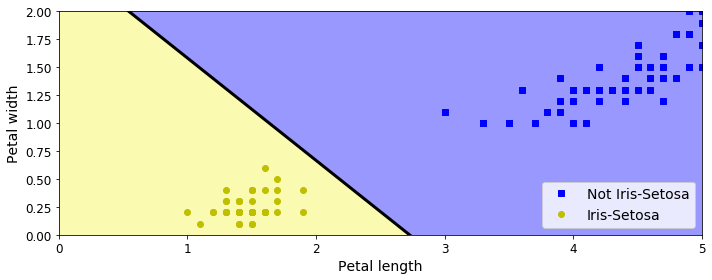

In [4]:
a = -per_clf.coef_[0][0] / per_clf.coef_[0][1]
b = -per_clf.intercept_ / per_clf.coef_[0][1]

axes = [0, 5, 0, 2]

x0, x1 = np.meshgrid(
        np.linspace(axes[0], axes[1], 500).reshape(-1, 1),
        np.linspace(axes[2], axes[3], 200).reshape(-1, 1),
    )
X_new = np.c_[x0.ravel(), x1.ravel()]
y_predict = per_clf.predict(X_new)
zz = y_predict.reshape(x0.shape)

plt.figure(figsize=(10, 4))
plt.plot(X[y==0, 0], X[y==0, 1], "bs", label="Not Iris-Setosa")
plt.plot(X[y==1, 0], X[y==1, 1], "yo", label="Iris-Setosa")

plt.plot([axes[0], axes[1]], [a * axes[0] + b, a * axes[1] + b], "k-", linewidth=3)
from matplotlib.colors import ListedColormap
custom_cmap = ListedColormap(['#9898ff', '#fafab0'])

plt.contourf(x0, x1, zz, cmap=custom_cmap)
plt.xlabel("Petal length", fontsize=14)
plt.ylabel("Petal width", fontsize=14)
plt.legend(loc="lower right", fontsize=14)
plt.axis(axes)

save_fig("perceptron_iris_plot")
plt.show()

# Activation functions

In [5]:
def sigmoid(z):
    return 1 / (1 + np.exp(-z))

def relu(z):
    return np.maximum(0, z)

def derivative(f, z, eps=0.000001):
    return (f(z + eps) - f(z - eps))/(2 * eps)

Saving figure activation_functions_plot


FileNotFoundError: [Errno 2] No such file or directory: '.\\images\\ann\\activation_functions_plot.png'

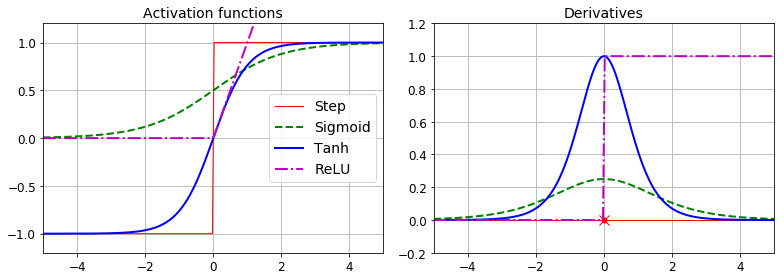

In [6]:
z = np.linspace(-5, 5, 200)

plt.figure(figsize=(11,4))

plt.subplot(121)
plt.plot(z, np.sign(z), "r-", linewidth=1, label="Step")
plt.plot(z, sigmoid(z), "g--", linewidth=2, label="Sigmoid")
plt.plot(z, np.tanh(z), "b-", linewidth=2, label="Tanh")
plt.plot(z, relu(z), "m-.", linewidth=2, label="ReLU")
plt.grid(True)
plt.legend(loc="center right", fontsize=14)
plt.title("Activation functions", fontsize=14)
plt.axis([-5, 5, -1.2, 1.2])

plt.subplot(122)
plt.plot(z, derivative(np.sign, z), "r-", linewidth=1, label="Step")
plt.plot(0, 0, "ro", markersize=5)
plt.plot(0, 0, "rx", markersize=10)
plt.plot(z, derivative(sigmoid, z), "g--", linewidth=2, label="Sigmoid")
plt.plot(z, derivative(np.tanh, z), "b-", linewidth=2, label="Tanh")
plt.plot(z, derivative(relu, z), "m-.", linewidth=2, label="ReLU")
plt.grid(True)
#plt.legend(loc="center right", fontsize=14)
plt.title("Derivatives", fontsize=14)
plt.axis([-5, 5, -0.2, 1.2])

save_fig("activation_functions_plot")
plt.show()

In [7]:
def heaviside(z):
    return (z >= 0).astype(z.dtype)

def mlp_xor(x1, x2, activation=heaviside):
    return activation(-activation(x1 + x2 - 1.5) + activation(x1 + x2 - 0.5) - 0.5)

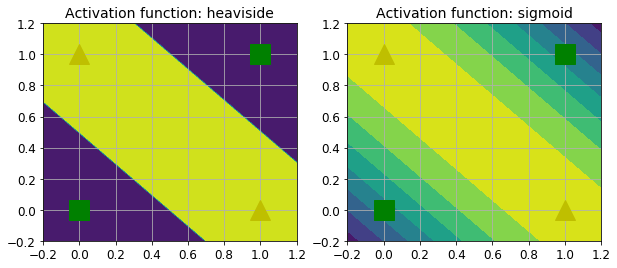

In [8]:
x1s = np.linspace(-0.2, 1.2, 100)
x2s = np.linspace(-0.2, 1.2, 100)
x1, x2 = np.meshgrid(x1s, x2s)

z1 = mlp_xor(x1, x2, activation=heaviside)
z2 = mlp_xor(x1, x2, activation=sigmoid)

plt.figure(figsize=(10,4))

plt.subplot(121)
plt.contourf(x1, x2, z1)
plt.plot([0, 1], [0, 1], "gs", markersize=20)
plt.plot([0, 1], [1, 0], "y^", markersize=20)
plt.title("Activation function: heaviside", fontsize=14)
plt.grid(True)

plt.subplot(122)
plt.contourf(x1, x2, z2)
plt.plot([0, 1], [0, 1], "gs", markersize=20)
plt.plot([0, 1], [1, 0], "y^", markersize=20)
plt.title("Activation function: sigmoid", fontsize=14)
plt.grid(True)

# FNN for MNIST

## Using the Estimator API (formerly `tf.contrib.learn`)

In [7]:
import tensorflow as tf

**Warning**: `tf.examples.tutorials.mnist` is deprecated. We will use `tf.keras.datasets.mnist` instead. Moreover, the `tf.contrib.learn` API was promoted to `tf.estimators` and `tf.feature_columns`, and it has changed considerably. In particular, there is no `infer_real_valued_columns_from_input()` function or `SKCompat` class.

In [8]:
(X_train, y_train), (X_test, y_test) = tf.keras.datasets.mnist.load_data()
X_train = X_train.astype(np.float32).reshape(-1, 28*28) / 255.0
X_test = X_test.astype(np.float32).reshape(-1, 28*28) / 255.0
y_train = y_train.astype(np.int32)
y_test = y_test.astype(np.int32)
X_valid, X_train = X_train[:5000], X_train[5000:]
y_valid, y_train = y_train[:5000], y_train[5000:]

In [9]:
feature_cols = [tf.feature_column.numeric_column("X", shape=[28 * 28])]
dnn_clf = tf.estimator.DNNClassifier(hidden_units=[300,100], n_classes=10,
                                     feature_columns=feature_cols)

input_fn = tf.estimator.inputs.numpy_input_fn(
    x={"X": X_train}, y=y_train, num_epochs=40, batch_size=50, shuffle=True)
dnn_clf.train(input_fn=input_fn)

INFO:tensorflow:Using default config.
INFO:tensorflow:Using config: {'_model_dir': 'C:\\Users\\lukeg\\AppData\\Local\\Temp\\tmpmpsgrx70', '_tf_random_seed': None, '_save_summary_steps': 100, '_save_checkpoints_steps': None, '_save_checkpoints_secs': 600, '_session_config': allow_soft_placement: true
graph_options {
  rewrite_options {
    meta_optimizer_iterations: ONE
  }
}
, '_keep_checkpoint_max': 5, '_keep_checkpoint_every_n_hours': 10000, '_log_step_count_steps': 100, '_train_distribute': None, '_device_fn': None, '_protocol': None, '_eval_distribute': None, '_experimental_distribute': None, '_service': None, '_cluster_spec': <tensorflow.python.training.server_lib.ClusterSpec object at 0x0000026B1239E240>, '_task_type': 'worker', '_task_id': 0, '_global_id_in_cluster': 0, '_master': '', '_evaluation_master': '', '_is_chief': True, '_num_ps_replicas': 0, '_num_worker_replicas': 1}
Instructions for updating:
To construct input pipelines, use the `tf.data` module.
Instructions for up

INFO:tensorflow:global_step/sec: 469.482
INFO:tensorflow:loss = 0.28331012, step = 6001 (0.213 sec)
INFO:tensorflow:global_step/sec: 469.482
INFO:tensorflow:loss = 0.71433717, step = 6101 (0.213 sec)
INFO:tensorflow:global_step/sec: 465.116
INFO:tensorflow:loss = 2.945748, step = 6201 (0.215 sec)
INFO:tensorflow:global_step/sec: 473.937
INFO:tensorflow:loss = 1.8360146, step = 6301 (0.211 sec)
INFO:tensorflow:global_step/sec: 473.929
INFO:tensorflow:loss = 1.8290391, step = 6401 (0.212 sec)
INFO:tensorflow:global_step/sec: 473.936
INFO:tensorflow:loss = 1.4907963, step = 6501 (0.210 sec)
INFO:tensorflow:global_step/sec: 465.118
INFO:tensorflow:loss = 6.6481495, step = 6601 (0.215 sec)
INFO:tensorflow:global_step/sec: 474.956
INFO:tensorflow:loss = 0.28443426, step = 6701 (0.211 sec)
INFO:tensorflow:global_step/sec: 473.924
INFO:tensorflow:loss = 1.3102136, step = 6801 (0.211 sec)
INFO:tensorflow:global_step/sec: 469.491
INFO:tensorflow:loss = 1.1638529, step = 6901 (0.213 sec)
INFO:ten

INFO:tensorflow:global_step/sec: 396.834
INFO:tensorflow:loss = 0.016966848, step = 14201 (0.252 sec)
INFO:tensorflow:global_step/sec: 442.478
INFO:tensorflow:loss = 0.015561356, step = 14301 (0.228 sec)
INFO:tensorflow:global_step/sec: 364.963
INFO:tensorflow:loss = 0.024028268, step = 14401 (0.273 sec)
INFO:tensorflow:global_step/sec: 421.942
INFO:tensorflow:loss = 0.362337, step = 14501 (0.236 sec)
INFO:tensorflow:global_step/sec: 429.184
INFO:tensorflow:loss = 0.08460448, step = 14601 (0.232 sec)
INFO:tensorflow:global_step/sec: 425.53
INFO:tensorflow:loss = 0.013838885, step = 14701 (0.236 sec)
INFO:tensorflow:global_step/sec: 420.169
INFO:tensorflow:loss = 0.29991037, step = 14801 (0.239 sec)
INFO:tensorflow:global_step/sec: 411.523
INFO:tensorflow:loss = 0.017521245, step = 14901 (0.243 sec)
INFO:tensorflow:global_step/sec: 448.432
INFO:tensorflow:loss = 0.04082292, step = 15001 (0.222 sec)
INFO:tensorflow:global_step/sec: 454.543
INFO:tensorflow:loss = 0.116382964, step = 15101

INFO:tensorflow:loss = 0.0073162657, step = 22301 (0.217 sec)
INFO:tensorflow:global_step/sec: 452.485
INFO:tensorflow:loss = 0.039509848, step = 22401 (0.222 sec)
INFO:tensorflow:global_step/sec: 458.719
INFO:tensorflow:loss = 0.08054756, step = 22501 (0.216 sec)
INFO:tensorflow:global_step/sec: 456.621
INFO:tensorflow:loss = 0.1731418, step = 22601 (0.219 sec)
INFO:tensorflow:global_step/sec: 467.291
INFO:tensorflow:loss = 0.2564805, step = 22701 (0.215 sec)
INFO:tensorflow:global_step/sec: 462.963
INFO:tensorflow:loss = 0.07582295, step = 22801 (0.216 sec)
INFO:tensorflow:global_step/sec: 460.829
INFO:tensorflow:loss = 0.0445569, step = 22901 (0.217 sec)
INFO:tensorflow:global_step/sec: 454.547
INFO:tensorflow:loss = 0.04336412, step = 23001 (0.220 sec)
INFO:tensorflow:global_step/sec: 403.224
INFO:tensorflow:loss = 0.019539995, step = 23101 (0.250 sec)
INFO:tensorflow:global_step/sec: 386.1
INFO:tensorflow:loss = 0.060317144, step = 23201 (0.258 sec)
INFO:tensorflow:global_step/sec

INFO:tensorflow:loss = 0.007996488, step = 30401 (0.217 sec)
INFO:tensorflow:global_step/sec: 458.713
INFO:tensorflow:loss = 0.017412292, step = 30501 (0.218 sec)
INFO:tensorflow:global_step/sec: 460.83
INFO:tensorflow:loss = 0.020632174, step = 30601 (0.217 sec)
INFO:tensorflow:global_step/sec: 456.624
INFO:tensorflow:loss = 0.059309475, step = 30701 (0.219 sec)
INFO:tensorflow:global_step/sec: 460.828
INFO:tensorflow:loss = 0.04214099, step = 30801 (0.218 sec)
INFO:tensorflow:global_step/sec: 460.829
INFO:tensorflow:loss = 0.011917344, step = 30901 (0.216 sec)
INFO:tensorflow:global_step/sec: 456.621
INFO:tensorflow:loss = 0.073427, step = 31001 (0.219 sec)
INFO:tensorflow:global_step/sec: 456.615
INFO:tensorflow:loss = 0.009980335, step = 31101 (0.219 sec)
INFO:tensorflow:global_step/sec: 460.836
INFO:tensorflow:loss = 0.015740538, step = 31201 (0.218 sec)
INFO:tensorflow:global_step/sec: 462.962
INFO:tensorflow:loss = 0.014160225, step = 31301 (0.216 sec)
INFO:tensorflow:global_ste

INFO:tensorflow:global_step/sec: 450.449
INFO:tensorflow:loss = 0.041094456, step = 38501 (0.222 sec)
INFO:tensorflow:global_step/sec: 446.429
INFO:tensorflow:loss = 0.056952152, step = 38601 (0.224 sec)
INFO:tensorflow:global_step/sec: 460.831
INFO:tensorflow:loss = 0.0049645836, step = 38701 (0.217 sec)
INFO:tensorflow:global_step/sec: 460.829
INFO:tensorflow:loss = 0.060703345, step = 38801 (0.217 sec)
INFO:tensorflow:global_step/sec: 399.997
INFO:tensorflow:loss = 0.025256181, step = 38901 (0.251 sec)
INFO:tensorflow:global_step/sec: 380.231
INFO:tensorflow:loss = 0.057368886, step = 39001 (0.262 sec)
INFO:tensorflow:global_step/sec: 450.45
INFO:tensorflow:loss = 0.034379788, step = 39101 (0.225 sec)
INFO:tensorflow:global_step/sec: 351.425
INFO:tensorflow:loss = 0.0023317952, step = 39201 (0.283 sec)
INFO:tensorflow:global_step/sec: 364.961
INFO:tensorflow:loss = 0.014971905, step = 39301 (0.274 sec)
INFO:tensorflow:global_step/sec: 387.597
INFO:tensorflow:loss = 0.023462396, step

In [12]:
test_input_fn = tf.estimator.inputs.numpy_input_fn(
    x={"X": X_test}, y=y_test, shuffle=False)
eval_results = dnn_clf.evaluate(input_fn=test_input_fn)

INFO:tensorflow:Calling model_fn.
INFO:tensorflow:Done calling model_fn.
INFO:tensorflow:Starting evaluation at 2018-05-18-19:12:49
INFO:tensorflow:Graph was finalized.
INFO:tensorflow:Restoring parameters from /tmp/tmpuflzeb_h/model.ckpt-44000
INFO:tensorflow:Running local_init_op.
INFO:tensorflow:Done running local_init_op.
INFO:tensorflow:Finished evaluation at 2018-05-18-19:12:50
INFO:tensorflow:Saving dict for global step 44000: accuracy = 0.9798, average_loss = 0.10096103, global_step = 44000, loss = 12.779877


In [13]:
eval_results

{'accuracy': 0.9798,
 'average_loss': 0.10096103,
 'global_step': 44000,
 'loss': 12.779877}

In [14]:
y_pred_iter = dnn_clf.predict(input_fn=test_input_fn)
y_pred = list(y_pred_iter)
y_pred[0]

INFO:tensorflow:Calling model_fn.
INFO:tensorflow:Done calling model_fn.
INFO:tensorflow:Graph was finalized.
INFO:tensorflow:Restoring parameters from /tmp/tmpuflzeb_h/model.ckpt-44000
INFO:tensorflow:Running local_init_op.
INFO:tensorflow:Done running local_init_op.


{'class_ids': array([7]),
 'classes': array([b'7'], dtype=object),
 'logits': array([ -3.809414 ,  -4.1564407,  -0.426081 ,   3.2636993, -11.065331 ,
         -8.790985 , -10.436305 ,  19.935707 ,  -6.9282775,   2.2807484],
       dtype=float32),
 'probabilities': array([4.8710768e-11, 3.4428106e-11, 1.4354495e-09, 5.7469666e-08,
        3.4389070e-14, 3.3431518e-13, 6.4506329e-14, 1.0000000e+00,
        2.1533745e-12, 2.1505466e-08], dtype=float32)}

## Using plain TensorFlow

In [15]:
import tensorflow as tf

n_inputs = 28*28  # MNIST
n_hidden1 = 300
n_hidden2 = 100
n_outputs = 10

In [16]:
reset_graph()

X = tf.placeholder(tf.float32, shape=(None, n_inputs), name="X")
y = tf.placeholder(tf.int32, shape=(None), name="y")

In [17]:
def neuron_layer(X, n_neurons, name, activation=None):
    with tf.name_scope(name):
        n_inputs = int(X.get_shape()[1])
        stddev = 2 / np.sqrt(n_inputs)
        init = tf.truncated_normal((n_inputs, n_neurons), stddev=stddev)
        W = tf.Variable(init, name="kernel")
        b = tf.Variable(tf.zeros([n_neurons]), name="bias")
        Z = tf.matmul(X, W) + b
        if activation is not None:
            return activation(Z)
        else:
            return Z

In [18]:
with tf.name_scope("dnn"):
    hidden1 = neuron_layer(X, n_hidden1, name="hidden1",
                           activation=tf.nn.relu)
    hidden2 = neuron_layer(hidden1, n_hidden2, name="hidden2",
                           activation=tf.nn.relu)
    logits = neuron_layer(hidden2, n_outputs, name="outputs")

In [19]:
with tf.name_scope("loss"):
    xentropy = tf.nn.sparse_softmax_cross_entropy_with_logits(labels=y,
                                                              logits=logits)
    loss = tf.reduce_mean(xentropy, name="loss")

In [20]:
learning_rate = 0.01

with tf.name_scope("train"):
    optimizer = tf.train.GradientDescentOptimizer(learning_rate)
    training_op = optimizer.minimize(loss)

In [21]:
with tf.name_scope("eval"):
    correct = tf.nn.in_top_k(logits, y, 1)
    accuracy = tf.reduce_mean(tf.cast(correct, tf.float32))

In [22]:
init = tf.global_variables_initializer()
saver = tf.train.Saver()

In [23]:
n_epochs = 40
batch_size = 50

In [24]:
def shuffle_batch(X, y, batch_size):
    rnd_idx = np.random.permutation(len(X))
    n_batches = len(X) // batch_size
    for batch_idx in np.array_split(rnd_idx, n_batches):
        X_batch, y_batch = X[batch_idx], y[batch_idx]
        yield X_batch, y_batch

In [25]:
with tf.Session() as sess:
    init.run()
    for epoch in range(n_epochs):
        for X_batch, y_batch in shuffle_batch(X_train, y_train, batch_size):
            sess.run(training_op, feed_dict={X: X_batch, y: y_batch})
        acc_batch = accuracy.eval(feed_dict={X: X_batch, y: y_batch})
        acc_val = accuracy.eval(feed_dict={X: X_valid, y: y_valid})
        print(epoch, "Batch accuracy:", acc_batch, "Val accuracy:", acc_val)

    save_path = saver.save(sess, "./my_model_final.ckpt")

0 Batch accuracy: 0.9 Val accuracy: 0.9146
1 Batch accuracy: 0.92 Val accuracy: 0.936
2 Batch accuracy: 0.96 Val accuracy: 0.945
3 Batch accuracy: 0.92 Val accuracy: 0.9512
4 Batch accuracy: 0.98 Val accuracy: 0.9558
5 Batch accuracy: 0.96 Val accuracy: 0.9566
6 Batch accuracy: 1.0 Val accuracy: 0.9612
7 Batch accuracy: 0.94 Val accuracy: 0.963
8 Batch accuracy: 0.98 Val accuracy: 0.9652
9 Batch accuracy: 0.96 Val accuracy: 0.966
10 Batch accuracy: 0.92 Val accuracy: 0.9688
11 Batch accuracy: 0.98 Val accuracy: 0.969
12 Batch accuracy: 0.98 Val accuracy: 0.967
13 Batch accuracy: 0.98 Val accuracy: 0.9706
14 Batch accuracy: 1.0 Val accuracy: 0.9714
15 Batch accuracy: 0.94 Val accuracy: 0.9732
16 Batch accuracy: 1.0 Val accuracy: 0.9736
17 Batch accuracy: 1.0 Val accuracy: 0.9742
18 Batch accuracy: 1.0 Val accuracy: 0.9746
19 Batch accuracy: 0.98 Val accuracy: 0.9748
20 Batch accuracy: 1.0 Val accuracy: 0.9752
21 Batch accuracy: 1.0 Val accuracy: 0.9752
22 Batch accuracy: 0.98 Val accura

In [26]:
with tf.Session() as sess:
    saver.restore(sess, "./my_model_final.ckpt") # or better, use save_path
    X_new_scaled = X_test[:20]
    Z = logits.eval(feed_dict={X: X_new_scaled})
    y_pred = np.argmax(Z, axis=1)

INFO:tensorflow:Restoring parameters from ./my_model_final.ckpt


In [27]:
print("Predicted classes:", y_pred)
print("Actual classes:   ", y_test[:20])

Predicted classes: [7 2 1 0 4 1 4 9 5 9 0 6 9 0 1 5 9 7 3 4]
Actual classes:    [7 2 1 0 4 1 4 9 5 9 0 6 9 0 1 5 9 7 3 4]


In [28]:
from tensorflow_graph_in_jupyter import show_graph

In [29]:
show_graph(tf.get_default_graph())

## Using `dense()` instead of `neuron_layer()`

Note: previous releases of the book used `tensorflow.contrib.layers.fully_connected()` rather than `tf.layers.dense()` (which did not exist when this chapter was written). It is now preferable to use `tf.layers.dense()`, because anything in the contrib module may change or be deleted without notice. The `dense()` function is almost identical to the `fully_connected()` function, except for a few minor differences:
* several parameters are renamed: `scope` becomes `name`, `activation_fn` becomes `activation` (and similarly the `_fn` suffix is removed from other parameters such as `normalizer_fn`), `weights_initializer` becomes `kernel_initializer`, etc.
* the default `activation` is now `None` rather than `tf.nn.relu`.
* a few more differences are presented in chapter 11.

In [30]:
n_inputs = 28*28  # MNIST
n_hidden1 = 300
n_hidden2 = 100
n_outputs = 10

In [31]:
reset_graph()

X = tf.placeholder(tf.float32, shape=(None, n_inputs), name="X")
y = tf.placeholder(tf.int32, shape=(None), name="y") 

In [32]:
with tf.name_scope("dnn"):
    hidden1 = tf.layers.dense(X, n_hidden1, name="hidden1",
                              activation=tf.nn.relu)
    hidden2 = tf.layers.dense(hidden1, n_hidden2, name="hidden2",
                              activation=tf.nn.relu)
    logits = tf.layers.dense(hidden2, n_outputs, name="outputs")
    y_proba = tf.nn.softmax(logits)

In [33]:
with tf.name_scope("loss"):
    xentropy = tf.nn.sparse_softmax_cross_entropy_with_logits(labels=y, logits=logits)
    loss = tf.reduce_mean(xentropy, name="loss")

In [34]:
learning_rate = 0.01

with tf.name_scope("train"):
    optimizer = tf.train.GradientDescentOptimizer(learning_rate)
    training_op = optimizer.minimize(loss)

In [35]:
with tf.name_scope("eval"):
    correct = tf.nn.in_top_k(logits, y, 1)
    accuracy = tf.reduce_mean(tf.cast(correct, tf.float32))

In [36]:
init = tf.global_variables_initializer()
saver = tf.train.Saver()

In [37]:
n_epochs = 20
n_batches = 50

with tf.Session() as sess:
    init.run()
    for epoch in range(n_epochs):
        for X_batch, y_batch in shuffle_batch(X_train, y_train, batch_size):
            sess.run(training_op, feed_dict={X: X_batch, y: y_batch})
        acc_batch = accuracy.eval(feed_dict={X: X_batch, y: y_batch})
        acc_valid = accuracy.eval(feed_dict={X: X_valid, y: y_valid})
        print(epoch, "Batch accuracy:", acc_batch, "Validation accuracy:", acc_valid)

    save_path = saver.save(sess, "./my_model_final.ckpt")

0 Batch accuracy: 0.9 Validation accuracy: 0.9024
1 Batch accuracy: 0.92 Validation accuracy: 0.9254
2 Batch accuracy: 0.94 Validation accuracy: 0.9372
3 Batch accuracy: 0.9 Validation accuracy: 0.9416
4 Batch accuracy: 0.94 Validation accuracy: 0.9472
5 Batch accuracy: 0.94 Validation accuracy: 0.9512
6 Batch accuracy: 1.0 Validation accuracy: 0.9548
7 Batch accuracy: 0.94 Validation accuracy: 0.961
8 Batch accuracy: 0.96 Validation accuracy: 0.962
9 Batch accuracy: 0.94 Validation accuracy: 0.9648
10 Batch accuracy: 0.92 Validation accuracy: 0.9656
11 Batch accuracy: 0.98 Validation accuracy: 0.9668
12 Batch accuracy: 0.98 Validation accuracy: 0.9684
13 Batch accuracy: 0.98 Validation accuracy: 0.9702
14 Batch accuracy: 1.0 Validation accuracy: 0.9696
15 Batch accuracy: 0.94 Validation accuracy: 0.9718
16 Batch accuracy: 0.98 Validation accuracy: 0.9728
17 Batch accuracy: 1.0 Validation accuracy: 0.973
18 Batch accuracy: 0.98 Validation accuracy: 0.9748
19 Batch accuracy: 0.98 Valida

In [38]:
show_graph(tf.get_default_graph())

# Exercise solutions

## 1. to 8.

See appendix A.

## 9.

_Train a deep MLP on the MNIST dataset and see if you can get over 98% precision. Just like in the last exercise of chapter 9, try adding all the bells and whistles (i.e., save checkpoints, restore the last checkpoint in case of an interruption, add summaries, plot learning curves using TensorBoard, and so on)._

First let's create the deep net. It's exactly the same as earlier, with just one addition: we add a `tf.summary.scalar()` to track the loss and the accuracy during training, so we can view nice learning curves using TensorBoard.

In [40]:
n_inputs = 28*28  # MNIST
n_hidden1 = 300
n_hidden2 = 100
n_outputs = 10

In [41]:
reset_graph()

X = tf.placeholder(tf.float32, shape=(None, n_inputs), name="X")
y = tf.placeholder(tf.int32, shape=(None), name="y") 

In [42]:
with tf.name_scope("dnn"):
    hidden1 = tf.layers.dense(X, n_hidden1, name="hidden1",
                              activation=tf.nn.relu)
    hidden2 = tf.layers.dense(hidden1, n_hidden2, name="hidden2",
                              activation=tf.nn.relu)
    logits = tf.layers.dense(hidden2, n_outputs, name="outputs")

In [43]:
with tf.name_scope("loss"):
    xentropy = tf.nn.sparse_softmax_cross_entropy_with_logits(labels=y, logits=logits)
    loss = tf.reduce_mean(xentropy, name="loss")
    loss_summary = tf.summary.scalar('log_loss', loss)

In [44]:
learning_rate = 0.01

with tf.name_scope("train"):
    optimizer = tf.train.GradientDescentOptimizer(learning_rate)
    training_op = optimizer.minimize(loss)

In [45]:
with tf.name_scope("eval"):
    correct = tf.nn.in_top_k(logits, y, 1)
    accuracy = tf.reduce_mean(tf.cast(correct, tf.float32))
    accuracy_summary = tf.summary.scalar('accuracy', accuracy)

In [46]:
init = tf.global_variables_initializer()
saver = tf.train.Saver()

Now we need to define the directory to write the TensorBoard logs to:

In [47]:
from datetime import datetime

def log_dir(prefix=""):
    now = datetime.utcnow().strftime("%Y%m%d%H%M%S")
    root_logdir = "tf_logs"
    if prefix:
        prefix += "-"
    name = prefix + "run-" + now
    return "{}/{}/".format(root_logdir, name)

In [48]:
logdir = log_dir("mnist_dnn")

Now we can create the `FileWriter` that we will use to write the TensorBoard logs:

In [49]:
file_writer = tf.summary.FileWriter(logdir, tf.get_default_graph())

Hey! Why don't we implement early stopping? For this, we are going to need to use the validation set.

In [50]:
m, n = X_train.shape

In [52]:
n_epochs = 10001
batch_size = 50
n_batches = int(np.ceil(m / batch_size))

checkpoint_path = "/tmp/my_deep_mnist_model.ckpt"
checkpoint_epoch_path = checkpoint_path + ".epoch"
final_model_path = "./my_deep_mnist_model"

best_loss = np.infty
epochs_without_progress = 0
max_epochs_without_progress = 50

with tf.Session() as sess:
    if os.path.isfile(checkpoint_epoch_path):
        # if the checkpoint file exists, restore the model and load the epoch number
        with open(checkpoint_epoch_path, "rb") as f:
            start_epoch = int(f.read())
        print("Training was interrupted. Continuing at epoch", start_epoch)
        saver.restore(sess, checkpoint_path)
    else:
        start_epoch = 0
        sess.run(init)

    for epoch in range(start_epoch, n_epochs):
        for X_batch, y_batch in shuffle_batch(X_train, y_train, batch_size):
            sess.run(training_op, feed_dict={X: X_batch, y: y_batch})
        accuracy_val, loss_val, accuracy_summary_str, loss_summary_str = sess.run([accuracy, loss, accuracy_summary, loss_summary], feed_dict={X: X_valid, y: y_valid})
        file_writer.add_summary(accuracy_summary_str, epoch)
        file_writer.add_summary(loss_summary_str, epoch)
        if epoch % 5 == 0:
            print("Epoch:", epoch,
                  "\tValidation accuracy: {:.3f}%".format(accuracy_val * 100),
                  "\tLoss: {:.5f}".format(loss_val))
            saver.save(sess, checkpoint_path)
            with open(checkpoint_epoch_path, "wb") as f:
                f.write(b"%d" % (epoch + 1))
            if loss_val < best_loss:
                saver.save(sess, final_model_path)
                best_loss = loss_val
            else:
                epochs_without_progress += 5
                if epochs_without_progress > max_epochs_without_progress:
                    print("Early stopping")
                    break

Epoch: 0 	Validation accuracy: 92.180% 	Loss: 0.30208
Epoch: 5 	Validation accuracy: 95.980% 	Loss: 0.15037
Epoch: 10 	Validation accuracy: 97.100% 	Loss: 0.11160
Epoch: 15 	Validation accuracy: 97.700% 	Loss: 0.09562
Epoch: 20 	Validation accuracy: 97.840% 	Loss: 0.08309
Epoch: 25 	Validation accuracy: 98.040% 	Loss: 0.07706
Epoch: 30 	Validation accuracy: 98.140% 	Loss: 0.07287
Epoch: 35 	Validation accuracy: 98.280% 	Loss: 0.07133
Epoch: 40 	Validation accuracy: 98.220% 	Loss: 0.06968
Epoch: 45 	Validation accuracy: 98.220% 	Loss: 0.06993
Epoch: 50 	Validation accuracy: 98.160% 	Loss: 0.07093
Epoch: 55 	Validation accuracy: 98.280% 	Loss: 0.06994
Epoch: 60 	Validation accuracy: 98.200% 	Loss: 0.06894
Epoch: 65 	Validation accuracy: 98.260% 	Loss: 0.06906
Epoch: 70 	Validation accuracy: 98.220% 	Loss: 0.07057
Epoch: 75 	Validation accuracy: 98.280% 	Loss: 0.06963
Epoch: 80 	Validation accuracy: 98.320% 	Loss: 0.07264
Epoch: 85 	Validation accuracy: 98.200% 	Loss: 0.07403
Epoch: 90 	V

In [53]:
os.remove(checkpoint_epoch_path)

In [54]:
with tf.Session() as sess:
    saver.restore(sess, final_model_path)
    accuracy_val = accuracy.eval(feed_dict={X: X_test, y: y_test})

INFO:tensorflow:Restoring parameters from ./my_deep_mnist_model


In [55]:
accuracy_val

0.9796